Libraries

In [42]:
import pandas as pd
import numpy as np
import requests   
import re # regular expression, helps us to match or find other strings or sets of strings
import string 
import nltk #for building programs for text analysis(The Natural Language Toolkit)
nltk.download('punkt')
nltk.download('stopwords')
#getting the stopwords from nltk corpus function
from nltk.corpus import stopwords 
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.corpus import wordnet
import textblob #perform basic NLP tasks.
from textblob import TextBlob
from textblob import Word
from keras.models import Sequential


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loadind the file

In [18]:
from google.colab import files 
uploaded = files.upload()

Saving Hotel_Reviews_Ratings.csv to Hotel_Reviews_Ratings.csv


In [19]:
hotel=pd.read_csv("Hotel_Reviews_Ratings.csv")

In [13]:
#First 5 observations
hotel.head()

,reviews,ratings
0,We have stayed at this excellent hotel before ...,5
1,We had a fantastic overnight staycation to rec...,5
2,We chose this hotel for an overnight stay base...,3
3,"Really nice hotel, staff were very helpful and...",5
4,We stayed here for a week in September and rea...,5


In [20]:
#Last 5 observations
hotel.tail()

,reviews,ratings
1995,This was our third stay at this lovely hotel a...,5
1996,We visited in early July and stayed for 5 nigh...,5
1997,"took my wife here for 5 nights, had a spa room...",4
1998,"Booked a double room. When I arrived, checked...",1
1999,Great Hotel. Was there for 3 nights. Staff w...,5


Data Preprocessing

In [21]:
#Next am joining all reviws in a paragraph         
hotel_reviews_string=" ".join(hotel["reviews"])

In [22]:
#Next I'm going to remove unwanted symbols from the reviews
hotel_reviews_string=re.sub("[^A-Za-z" "]+"," ",hotel_reviews_string).lower()
#spliting every words line by line from the reviews
hotel_reviews=hotel_reviews_string.split(" ")

In [24]:
from google.colab import files 
uploaded = files.upload()
#importing the stopwords 
with open("stopwords.txt","r") as sw:
    stopwords = sw.read()
#splitting the stop words by line
stopwords=stopwords.split("\n")

Saving stopwords.txt to stopwords (1).txt


In [25]:

#applying this stopwords to the hotel reviews and removing those stopwords from there
hotel_reviews_words=[v for v in hotel_reviews if not v in stopwords]

#joinig all reviews in a paragraph
hotel_reviews_string=" ".join(hotel_reviews_words)

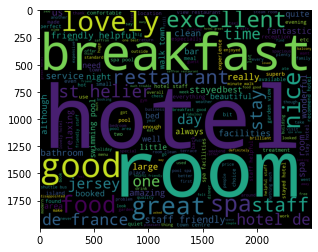

In [26]:
#next I would like to visualize the worldcloud plot to see the most frequent words from the reviews

wordcloud_hotel=WordCloud(
                      background_color="black",
                      width=2500,
                      height=2000
                      ).generate(hotel_reviews_string)
plt.imshow(wordcloud_hotel)

In [29]:
from google.colab import files 
uploaded = files.upload()
#Next I'm going to see the postive words from the reviews to perform sentimental analysis
#for that am going to import these positive words
with open("positive-words.txt","r")as pos:
    poswords=pos.read().split("\n")


Saving positive-words.txt to positive-words.txt


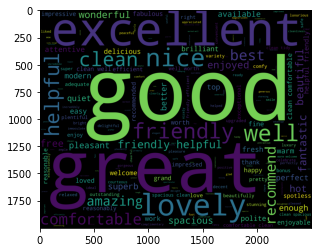

In [30]:
#Next I want to see the most frequent positive words about this hotel powder    
#for that am going to visualize the wordcloud plot again...
hotel_positive=" ".join([v for v in hotel_reviews_words if v in poswords])    

wordcloud_positive=WordCloud(
                       background_color="black",
                       width=2500,
                       height=2000
                       ).generate(hotel_positive)
plt.imshow(wordcloud_positive)

In [31]:
from google.colab import files 
uploaded = files.upload()
#Next I'm going to identify the negative words from the reviews
#importing the negative words
with open("negative-words.txt","r")as neg:
    negwords=neg.read().split("\n")
#for that am visualizing the wordcloud plot again.

Saving negative-words.txt to negative-words.txt


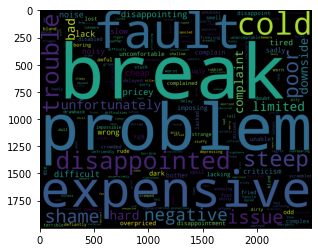

In [33]:
hotel_negative=" ".join([v for v in hotel_reviews_words if v in negwords])

wordcloud_negative=WordCloud(
                      background_color="black",
                      width=2500,
                      height=2000
                      ).generate(hotel_negative)
plt.imshow(wordcloud_negative)

(array([  19.,    0.,   40.,    0.,    0.,  172.,    0.,  576.,    0.,
        1193.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

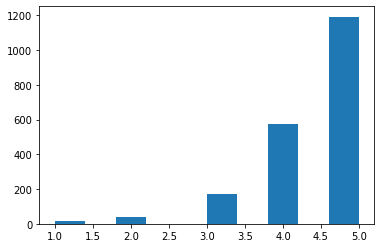

In [34]:
#Histogram
plt.hist(hotel["ratings"])


In [35]:
#Counting the ratings
hotel["ratings"].value_counts()

5    1193
4     576
3     172
2      40
1      19
Name: ratings, dtype: int64

Data Cleaning

In [36]:
##################                DATA CLEANING              ###################
hotel.columns
#Index(['reviews', 'ratings'], dtype='object')

#converting the reviews to lower case
hotel['Reviews']= hotel['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

#removing the punctuations from the reviews
hotel['Reviews']=hotel['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

#removing the numericals from the reviews
hotel['Reviews']=hotel['Reviews'].str.replace('[0-9]','')

from nltk.corpus import stopwords 
#removing all the stopwords from the reviews
stop_words=stopwords.words('english')
hotel['Reviews']=hotel['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

#Applying Lemmitaization to the reviews
hotel['Reviews']= hotel['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#removing the unwanted symbols from the reviews
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
hotel['Reviews']= hotel['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [45]:
sia = SIA()
results = []

for line in hotel['Reviews']:
    pol_score = sia.polarity_scores(line)
    pol_score['Reviews'] = line
    results.append(pol_score)
results

[{'Reviews': 'stayed excellent hotel hoped stay today however due negative change covid number impending government restriction felt reluctant visit phoning morning advised could still check new rule expressed concern dealt kindest efficient manner cannot wait return hotel de france experience fabulous spa fantastic saffron’s restaurant thank exemplary excellent customer service',
  'compound': 0.9413,
  'neg': 0.112,
  'neu': 0.548,
  'pos': 0.34},
 {'Reviews': 'fantastic overnight staycation recharge battery due lack holiday certainly swim spa probably loveliest pool jersey infinity pool subdued blue lighting perfect temperature plenty space spa area followed fantastic course meal garden view restaurant staff friendly helpful hotel spotlessly clean usual protocol covid place making feel safe christmas decoration making hotel feel warm welcoming would highly recommend hotel thank lovely weekend',
  'compound': 0.9895,
  'neg': 0.026,
  'neu': 0.505,
  'pos': 0.469},
 {'Reviews': 'chos

#Polarity scores will allow us to get the compound score and it will classifies the review into positve or negative, neutral.
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [46]:
polarity = pd.DataFrame.from_records(results)
polarity.head
polarity['Sentimentss'] = 0
polarity.loc[polarity['compound'] > 0.5, 'Sentimentss'] = 1
polarity.loc[polarity['compound'] < -0.5, 'Sentimentss'] = -1
polarity.head(10)

,neg,neu,pos,compound,Reviews,Sentimentss
0,0.112,0.548,0.340,0.9413,stayed excellent hotel hoped stay today howeve...,1
1,0.026,0.505,0.469,0.9895,fantastic overnight staycation recharge batter...,1
2,0.050,0.663,0.286,0.9274,chose hotel overnight stay based pool facility...,1
3,0.000,0.337,0.663,0.9665,really nice hotel staff helpful friendly weari...,1
4,0.018,0.468,0.514,0.9921,stayed week september really enjoyed stay staf...,1
5,0.063,0.550,0.387,0.9843,covid crisis trick hotel hospitality business ...,1
6,0.000,0.599,0.401,0.9287,stayed hotel time month business staff hotel w...,1
7,0.000,0.534,0.466,0.9705,hotel offered outstanding service start finnis...,1
8,0.049,0.403,0.548,0.9958,stayed week july wasnt disappointed hotel amaz...,1
9,0.040,0.521,0.439,0.9777,spent wonderful afternoon hotel de france indu...,1


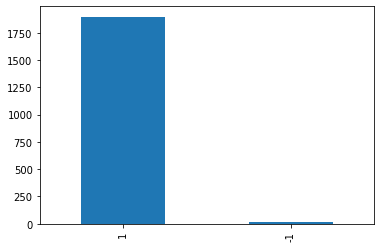

In [47]:
#method1
hotel1=hotel.copy()
hotel1['sent']= polarity.Sentimentss
hotel1= hotel1[hotel1['sent'] != 0] 
hotel1['sent'].value_counts().plot.bar()

In [48]:
#method2
polarity1=polarity.copy()
polarity1['Sentiments'] = 0
polarity1.loc[polarity1['pos'] >polarity1['neg'], 'Sentiments'] = 1
polarity1.loc[polarity1['neg'] >polarity1['pos'],'Sentiments'] = -1
polarity1['Sentiments'].value_counts()

 1    1942
-1      57
 0       1
Name: Sentiments, dtype: int64

In [49]:
hotel2=hotel.copy()
hotel2['sent'] = polarity1['Sentiments']
hotel2= hotel2[hotel2['sent'] != 0] 

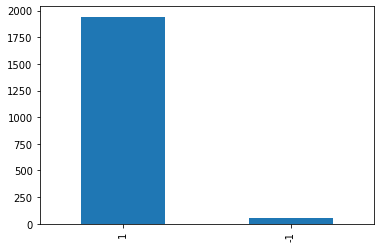

In [50]:
hotel2.sent.value_counts().plot.bar()


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

hotel["neg"] = hotel["reviews"].apply (lambda x:sia.polarity_scores(x)["neg"])
hotel["neu"] = hotel["reviews"].apply (lambda x:sia.polarity_scores(x)["neu"])
hotel["pos"] = hotel["reviews"].apply (lambda x:sia.polarity_scores(x)["pos"])
hotel["compound"] = hotel["reviews"].apply (lambda x:sia.polarity_scores(x)["compound"])

In [52]:
hotel["target"] = np.where(hotel["ratings"]>2.5 , 1, 0)
hotel.head()

,reviews,ratings,Reviews,neg,neu,pos,compound,target
0,We have stayed at this excellent hotel before ...,5,stayed excellent hotel hoped stay today howeve...,0.051,0.734,0.214,0.9598,1
1,We had a fantastic overnight staycation to rec...,5,fantastic overnight staycation recharge batter...,0.017,0.671,0.312,0.9895,1
2,We chose this hotel for an overnight stay base...,3,chose hotel overnight stay based pool facility...,0.027,0.814,0.159,0.9357,1
3,"Really nice hotel, staff were very helpful and...",5,really nice hotel staff helpful friendly weari...,0.000,0.578,0.422,0.9659,1
4,We stayed here for a week in September and rea...,5,stayed week september really enjoyed stay staf...,0.012,0.683,0.305,0.9932,1


In [53]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

In [54]:
import matplotlib.pyplot as plt
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [55]:
words = basic_clean(''.join(str(hotel['reviews'].tolist())))
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

bigrams_series

Text(0.5, 0, '# of Occurances')

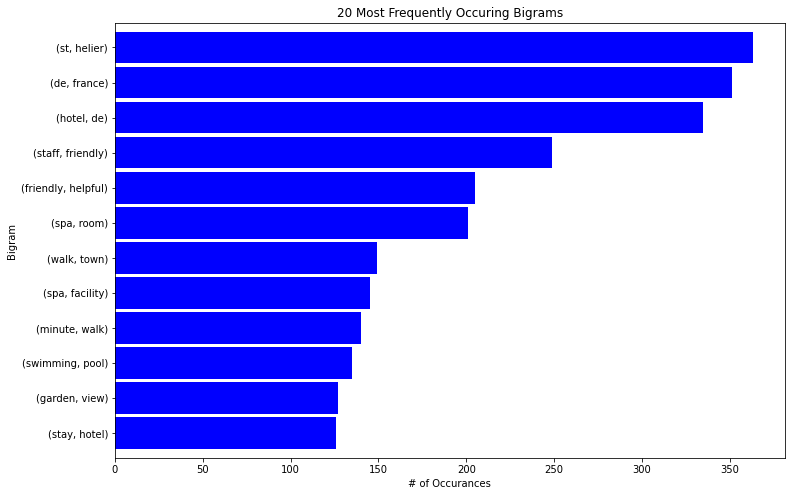

In [56]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

trigrams_series

Text(0.5, 0, '# of Occurances')

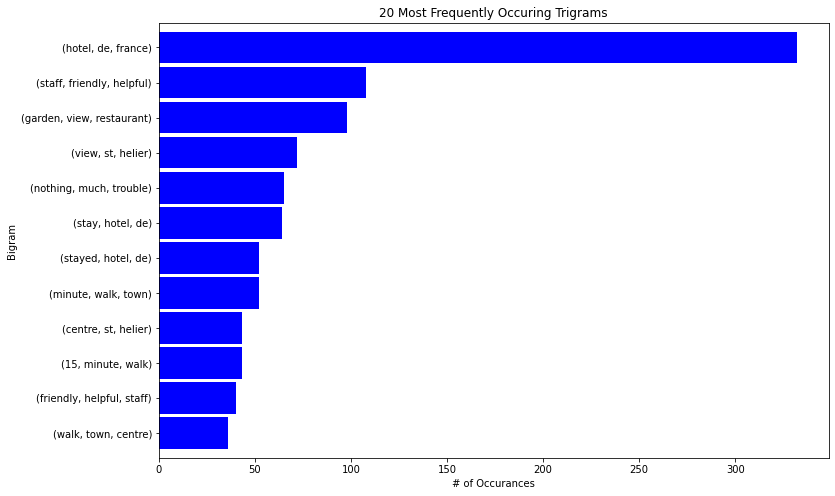

In [57]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')